## Extract FLASH Data in yt
Mirielle Wong

6/21/24

Use yt's covering_grid class to extract data from FLASH.

In [1]:
# https://yt-project.org/

import yt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook
yt.toggle_interactivity()

from datetime import datetime

Using matplotlib backend: nbAgg


In [2]:
# plot_path = "./OSIRIS_transfer/MAGOFF/MagShockZ_hdf5_plt_cnt_0004"
plot_path = "./OSIRIS_transfer/MAGON/MagShockZ_hdf5_chk_0005"

In [3]:
ds = yt.load(plot_path)

yt : [INFO     ] 2024-07-11 13:55:05,124 Particle file found: MagShockZ_hdf5_chk_0005
yt : [INFO     ] 2024-07-11 13:55:05,167 Parameters: current_time              = 1.8520020414484505e-09
yt : [INFO     ] 2024-07-11 13:55:05,167 Parameters: domain_dimensions         = [288 272 288]
yt : [INFO     ] 2024-07-11 13:55:05,168 Parameters: domain_left_edge          = [-0.6   -0.075 -0.6  ]
yt : [INFO     ] 2024-07-11 13:55:05,168 Parameters: domain_right_edge         = [0.6 1.  0.6]
yt : [INFO     ] 2024-07-11 13:55:05,169 Parameters: cosmological_simulation   = 0


In [4]:
list(ds.fields.flash)

[On-Disk Field ('flash', 'absr'): (units: '', display_name: 'Absorption Coefficient'),
 On-Disk Field ('flash', 'cham'): (units: '', display_name: 'Chamber Material Fraction'),
 On-Disk Field ('flash', 'cond'): (units: '', display_name: 'Conductivity'),
 On-Disk Field ('flash', 'dbgs'): (units: '', display_name: 'Debug for Shocks'),
 On-Disk Field ('flash', 'dens'): (units: 'code_mass/code_length**3'),
 On-Disk Field ('flash', 'depo'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'dfcf'): (units: '', display_name: 'Diffusion Equation Scalar'),
 On-Disk Field ('flash', 'divb'): (units: 'code_magnetic/code_length'),
 On-Disk Field ('flash', 'eele'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Electron Internal Specific Energy'),
 On-Disk Field ('flash', 'eint'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'eion'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Ion Internal Specific Energy'),
 On-Disk Field ('

In [5]:
print(ds.domain_dimensions)
domain_left_edge = [-0.6, -0.075, -0.6]    # from info printed in yt.load

[288 272 288]


In [6]:
# this is from the yt documentation

level = 2
dims = ds.domain_dimensions * ds.refine_by**level

# We construct an object that describes the data region and structure we want
# In this case, we want all data up to the maximum "level" of refinement
# across the entire simulation volume.  Higher levels than this will not
# contribute to our covering grid.
all_data = ds.covering_grid(
    level,
    left_edge=domain_left_edge,
    dims=dims,
    # And any fields to preload (this is optional!)
)

In [7]:
# relevant vars

print(ds.units)
print(ds.length_unit)
print(ds.mass_unit)
print(dims)
print(ds.domain_dimensions)
print(ds.refine_by)

1.0 cm
1.0 g
[1152 1088 1152]
[288 272 288]
2


In [8]:
data_level0 = ds.covering_grid(
    1,
    left_edge=domain_left_edge,
    dims=ds.domain_dimensions
)

In [9]:
# check shape

print(data_level0['flash', 'vely'][:, :, 0].shape)
print(data_level0['index', 'cell_volume'].shape)

(288, 272)
(288, 272, 288)


In [10]:
# we can create a df for any any field in ds.fields.flash
ye = pd.DataFrame(data_level0['flash', 'ye'][:, :, 0]) # why is this taking the zeroth index?
tion = pd.DataFrame(data_level0['flash', 'tion'][:, :, 0])

In [11]:
density = pd.DataFrame(data_level0['flash', 'dens'][:, :, -1])
trad = pd.DataFrame(data_level0['flash', 'trad'][:, :, -1])

cell_volume = pd.DataFrame(data_level0['index', 'cell_volume'][:,:,-1])
density.head

<bound method NDFrame.head of        0      1      2      3      4      5      6      7      8      9    \
0    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
1    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
2    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
3    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
4    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
283  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
284  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
285  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
286  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
287  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   

     ...       262       263       264       

yt : [INFO     ] 2024-07-11 13:56:24,227 xlim = -0.075000 1.000000
yt : [INFO     ] 2024-07-11 13:56:24,228 ylim = -0.600000 0.600000
yt : [INFO     ] 2024-07-11 13:56:24,230 xlim = -0.075000 1.000000
yt : [INFO     ] 2024-07-11 13:56:24,230 ylim = -0.600000 0.600000
yt : [INFO     ] 2024-07-11 13:56:24,231 Making a fixed resolution buffer of (('flash', 'vely')) 800 by 800



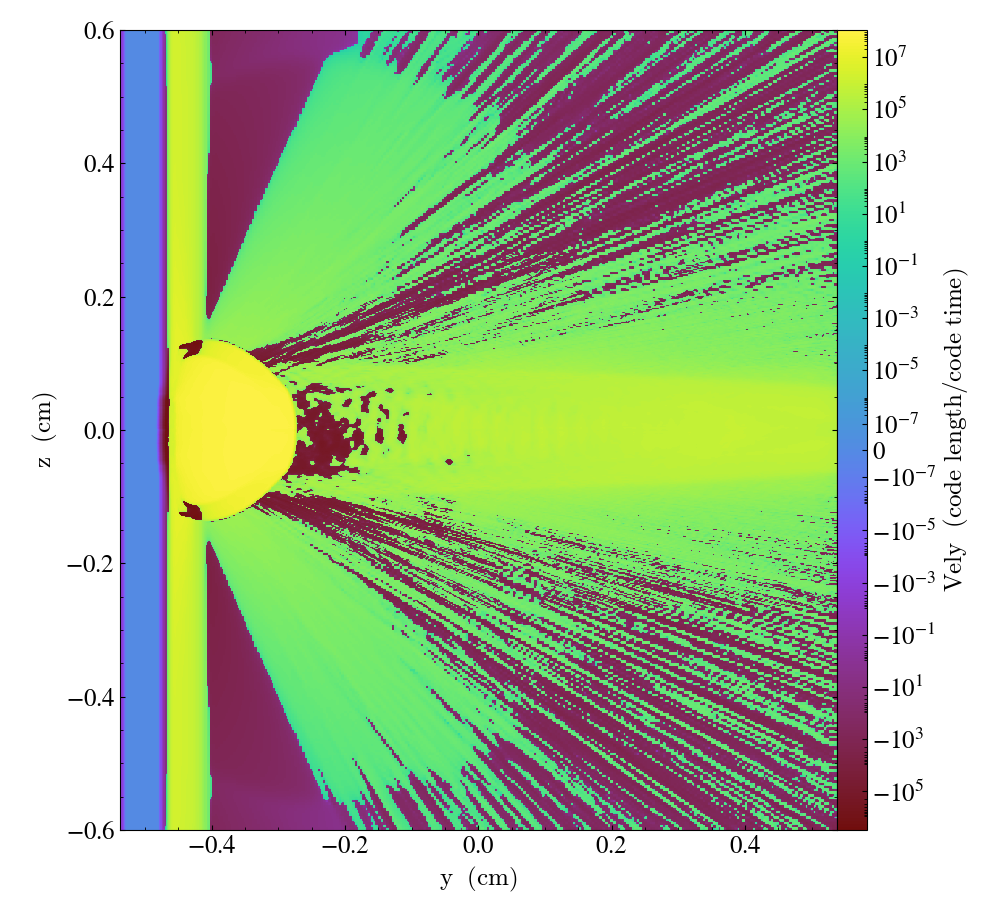

In [15]:
slc = yt.SlicePlot(ds,"x",("vely"))
slc

yt : [INFO     ] 2024-07-11 13:59:52,250 Projection completed
yt : [INFO     ] 2024-07-11 13:59:52,251 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-11 13:59:52,252 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-11 13:59:52,254 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-11 13:59:52,254 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-11 13:59:52,255 Making a fixed resolution buffer of (('flash', 'vely')) 800 by 800



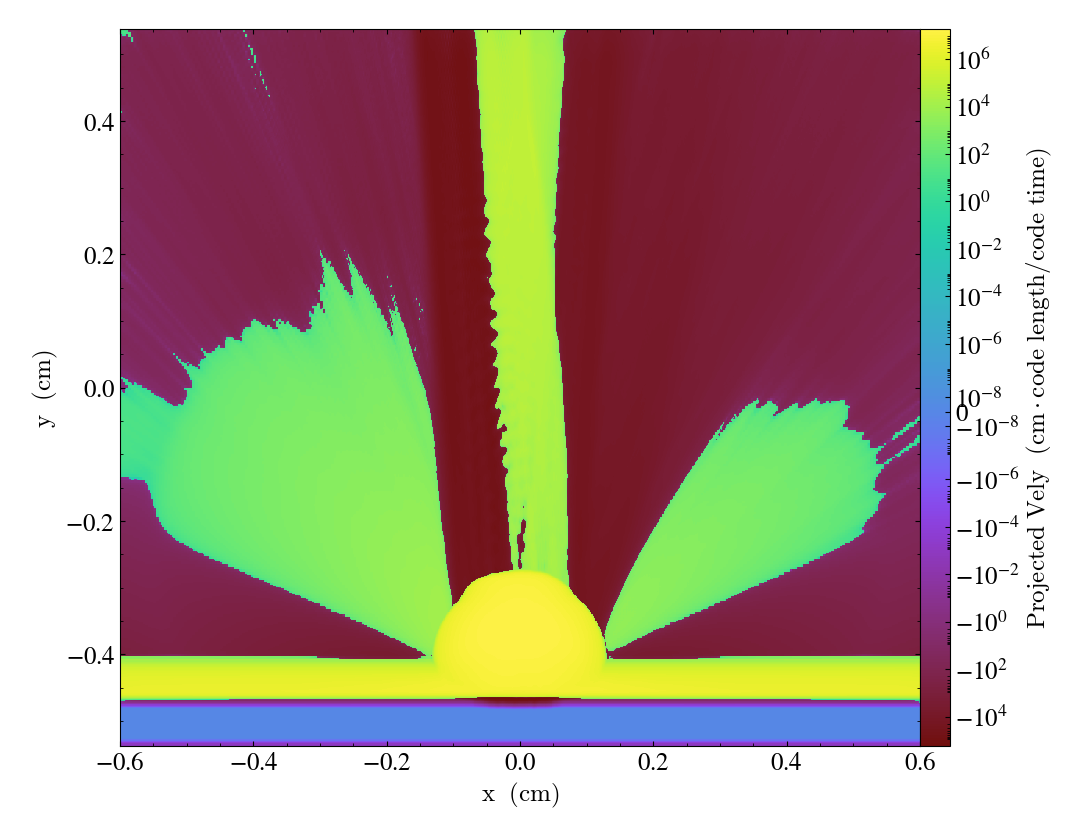

In [17]:
prj = yt.ProjectionPlot(ds,'z','vely')
prj

In [13]:
density.to_csv("dens_grid.csv", index=False)

In [14]:
density.to_hdf("dens_grid.h5", key='density')